<a href="https://colab.research.google.com/github/Adevrari/Linear-regression/blob/main/_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

**We as a machine learning engineer have to build a model that can predict sales based on the money spent on different platforms for marketing**

Using the problem statement, it's pretty clear that we have to analyze or predict the sales.

**y = sales**

<hr>

# **Step 1 - Import the necessary libraries**

**1. Configuration libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**2. Mandatory ones**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**3. Machine Learning Libraries and evaluations**

In [ ]:
from sklearn.metrics import *  # import everything
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

<hr>

# **Step 2 - Data Loading and Inspection**

In [ ]:
df = pd.read_csv('/content/advertising.csv')

**Data Inspection**

In [ ]:
df.head().style.set_properties(
    **{
        'background-color':'red',
        "color": 'white',
        "border-color":'black',
        'border-style': 'solid'
    }
)

,TV,Radio,Newspaper,Sales
0,230.100000,37.800000,69.200000,22.100000
1,44.500000,39.300000,45.100000,10.400000
2,17.200000,45.900000,69.300000,12.000000
3,151.500000,41.300000,58.500000,16.500000
4,180.800000,10.800000,58.400000,17.900000


In [ ]:
# try!!!
# df.head().style.background_gradient(cmap = 'rainbow')

In [ ]:
a = df.shape
print(f'The rows are : {a[0]} and columns: {a[1]}')

The rows are : 200 and columns: 4


In [ ]:
df.shape

(200, 4)

**Information about the data**

* info(): It will be used for getting the information about the data

* describe(): It will be used when you want statistical summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Insights:
* There are no null values present
* All the columns are numericals in nature


**Statistical Summary**

In [ ]:
df.describe().T.style.set_properties(
    **{
        'background-color':'blue',
        "color": 'white',
        "border-color":'white',
        'border-style': 'solid'
    }
)

,count,mean,std,min,25%,50%,75%,max
TV,200.000000,147.042500,85.854236,0.700000,74.375000,149.750000,218.825000,296.400000
Radio,200.000000,23.264000,14.846809,0.000000,9.975000,22.900000,36.525000,49.600000
Newspaper,200.000000,30.554000,21.778621,0.300000,12.750000,25.750000,45.100000,114.000000
Sales,200.000000,15.130500,5.283892,1.600000,11.000000,16.000000,19.050000,27.000000


**Insights**
* In most of the situation, we can clearly see that we would be having a normal distribution (2 out of 3 situation)

<hr>

# **Step 3 - Data Cleaning**

In [ ]:
# null values
df.isnull().sum().to_frame().style.set_properties(**{
    "background-color":'red',
    "color":"white",
    'border-color': 'white',
    'border-style': 'solid'
    })

,0
TV,0
Radio,0
Newspaper,0
Sales,0


**Outliers Analysis**

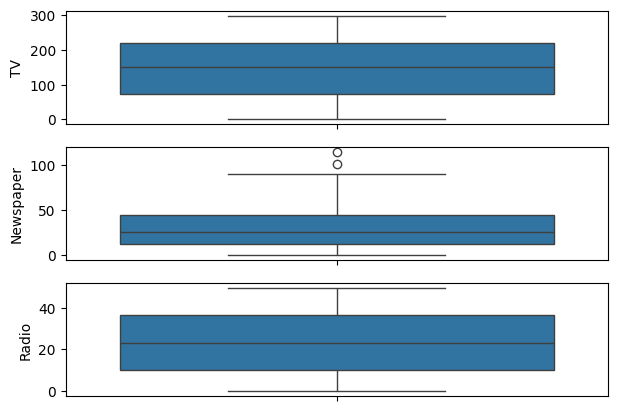

In [ ]:
fig, axs = plt.subplots(3, figsize = (7, 5))

plt1 = sns.boxplot(df['TV'], ax = axs[0])

plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])

plt3 = sns.boxplot(df['Radio'], ax = axs[2])



In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(df['TV'])
fig.show()

In [ ]:
fig = px.box(df['Radio'])
fig.show()

In [ ]:
fig = px.box(df['Newspaper'])
fig.show()

Insights

* Since there are very less number of outlier, we can neglect it

<hr>

# **Step 4 - EDA**

**Correlation check ✅**

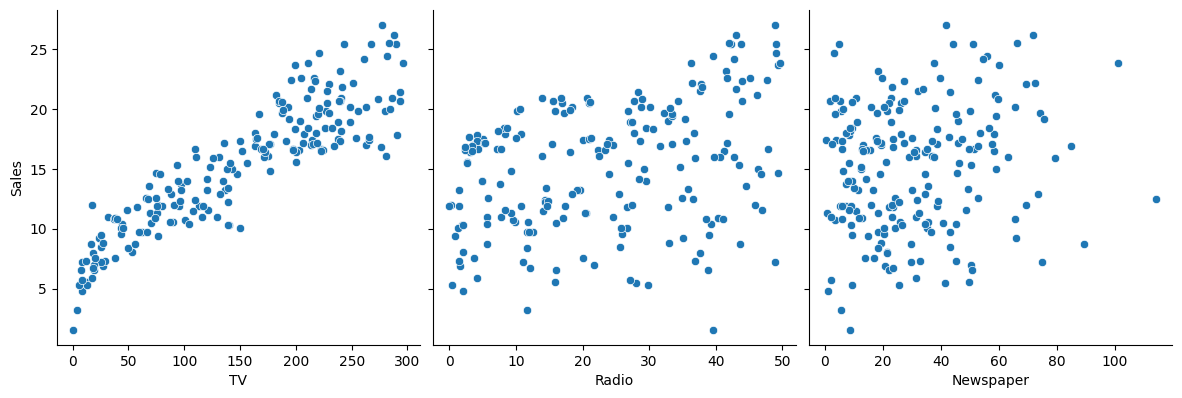

In [ ]:
# first way scatter plot
sns.pairplot(
    df, x_vars = ['TV', "Radio", 'Newspaper'], y_vars = "Sales",
    kind = 'scatter', height = 4
)

Insights

* The TV columns looks much more appropriate

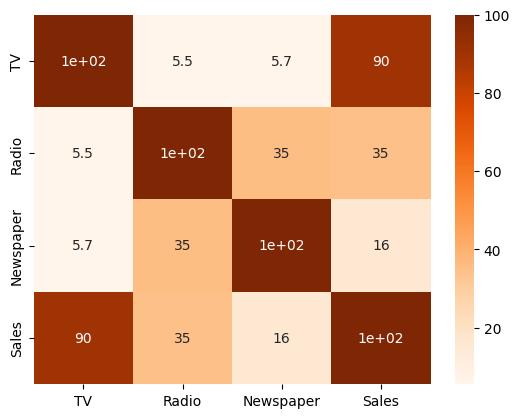

In [ ]:
# heatmap
sns.heatmap(df.corr()*100, cmap = 'Oranges', annot = True)
plt.show()

Insight
* TV seems to be the most relevant columns, hence we will use this columns as our feature column and rest we will ignore

<hr>

# **Step 5 - Model Building**

**Formula: `y = mx + c`**

Breakdown:
* y - response
* c - intercept
* m - coefficient of the feature


**What is going to happen in this code?**

**Formula here: `sales = c + m1 x TV`**

**Train and test split our data**

In [ ]:
# feature data
x = df['TV']

# target data
y = df['Sales']

In [ ]:
x = np.array(x).reshape(-1, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

**Model Implementation**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
TV = model.coef_
const = model.intercept_

In [ ]:
print(f'Value for const: {const}\nValue for TV: {TV[0]}')

Value for const: 6.948683200001357
Value for TV: 0.054545752915907963


value to work with:

**`Sales`: 6.948 + 0.054 * x_train**

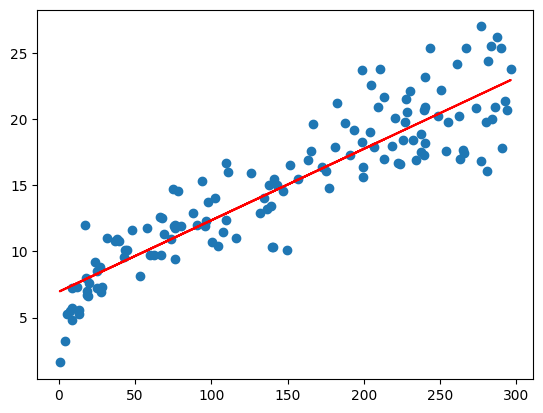

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054 * x_train, 'r')
plt.show()

**Model Building**

In [ ]:
pred = model.predict(x_test)

**Error Part**

In [ ]:
pred_data = pd.DataFrame(columns = ['Actual Data', 'Predictions'])

In [ ]:
pred_data

,Actual Data,Predictions


In [ ]:
pred_data["Actual Data"] = y_test

pred_data['Predictions'] = pred

In [ ]:
pred_data

,Actual Data,Predictions
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392
167,17.2,18.228745
116,12.2,14.541452
96,16.7,17.726924
52,22.6,18.752384
69,22.3,18.774202


In [ ]:
pred_data['Error'] = pred_data['Actual Data'] - pred_data['Predictions']

pred_data

,Actual Data,Predictions,Error
126,6.6,7.374140,-0.774140
104,20.7,19.941482,0.758518
99,17.2,14.323269,2.876731
92,19.4,18.823294,0.576706
111,21.8,20.132392,1.667608
167,17.2,18.228745,-1.028745
116,12.2,14.541452,-2.341452
96,16.7,17.726924,-1.026924
52,22.6,18.752384,3.847616
69,22.3,18.774202,3.525798


**Evaluation**

In [ ]:
def evaluation(actData, predData):
  # calculate the r2score
  print(f'R2Score: {r2_score(actData, predData)}')

  # calculate MSE
  a = mean_squared_error(actData, predData)
  print(f'MSE: {a}')

  # calculate the RMSE
  print(f'RMSE Value: {np.sqrt(a)}')

  # calculate MAE
  print(f'MAE Value: {mean_absolute_error(actData, predData)}')

In [ ]:
evaluation(y_test, pred)

R2Score: 0.7921031601245662
MSE: 4.077556371826948
RMSE Value: 2.019296008966231
MAE Value: 1.6480589869746525


**Based on the provided metrics:**

1. **Reasonably Good Fit:**
  R-squared score of 0.7921 indicates that the model explains about 79.21% of the variance in the dependent variable. This suggests a reasonably good fit.

2. **Moderate Error:**
  RMSE of 2.0193 and MAE of 1.6481 imply that on average, predictions deviate from the actual values by around 2.02 and 1.65 units, respectively. This suggests moderate error in predictions.

3. **Linear Relationship:**
  The fact that a linear regression model was used successfully implies that there is likely a linear relationship between the independent and dependent variables.

4. **Potential for Improvement:**
  While the model explains a significant portion of the variance, there is still room for improvement as evidenced by the error metrics. Further model tuning or exploration of other model types might be beneficial.
  
5. **Interpretability:**
  Linear regression models are generally easier to interpret compared to more complex models. This can be advantageous for understanding the relationships between variables.
Overall, these metrics suggest that the linear regression model provides a reasonable fit with moderate error. Further analysis and model refinement might be necessary depending on the specific requirements and context.